In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='darkgrid')

##### Part I. 가로막대 그래프 
###### seaborn gallary : https://seaborn.pydata.org/examples/horizontal_barplot.html

In [2]:
car_crash = sns.load_dataset('car_crashes')
car_crash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [3]:
car_crash.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [4]:
## 교통사고 건수를 total, 과속, 음주를 기준으로 각각 내림차순 정렬하여 따로 저장 
tot_crash = car_crash.sort_values('total', ascending=False)
speed_crash = car_crash.sort_values('speeding', ascending=False)  ## 과속
alc_crash = car_crash.sort_values('alcohol', ascending=False)     ## 음주운전 
npre_crash = car_crash.sort_values('no_previous', ascending=False)    ## 전방부주의

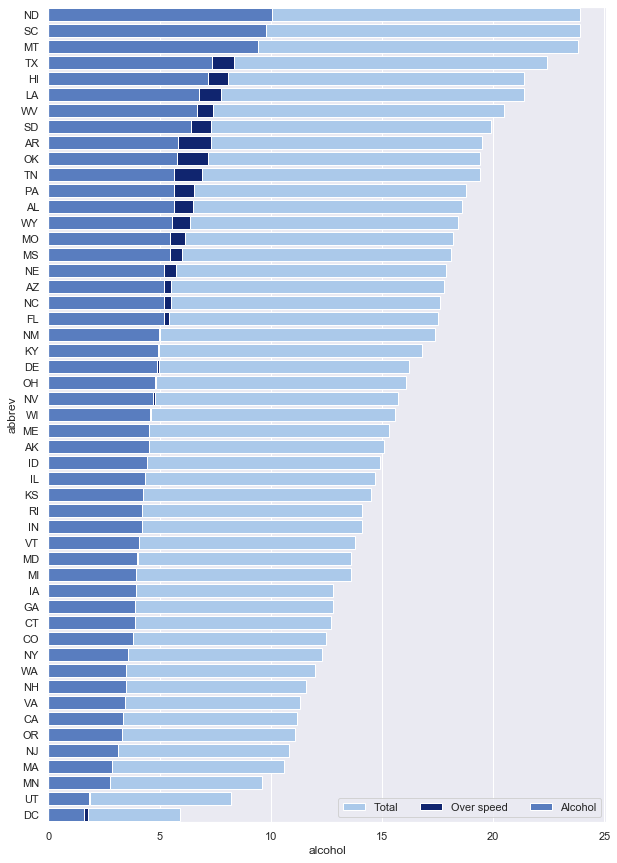

In [5]:
plt.figure(figsize=(10,15)) 

sns.set_color_codes("pastel")   ## 전체: 파스텔톤 사용 
sns.barplot(data=tot_crash, x='total', y='abbrev', color = 'b', label = 'Total')

sns.set_color_codes("dark")   ## 과속: 어두운톤 사용 
sns.barplot(data=speed_crash, x='speeding', y='abbrev', color = 'b', label = 'Over speed')

sns.set_color_codes("muted")   ## 음주: 흐린톤 사용 
sns.barplot(data=alc_crash, x='alcohol', y='abbrev', color = 'b', label = 'Alcohol')

plt.legend(ncol= 3, loc='best')   ## 범례 지정 

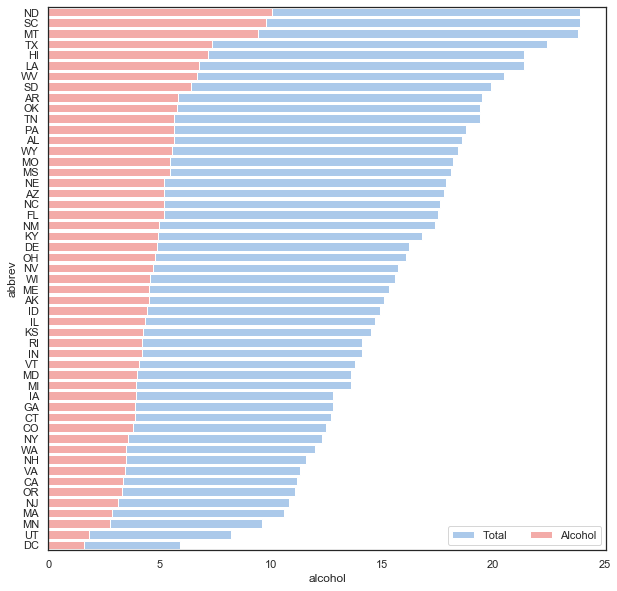

In [6]:
## 간단하게 이렇게도 할 수 있다. 
plt.figure(figsize=(10,10)) 
sns.set(style="white", palette="pastel")
sns.barplot(data=tot_crash, x='total', y='abbrev', color = 'b', label = 'Total')
sns.barplot(data=alc_crash, x='alcohol', y='abbrev', color = 'r', label = 'Alcohol')
plt.legend(ncol= 2, loc='best')   ## 범례 지정 

##### Part II. boxplot
###### seaborn gallary : https://seaborn.pydata.org/examples/grouped_boxplot.html

In [7]:
tips = sns.load_dataset('tips')
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


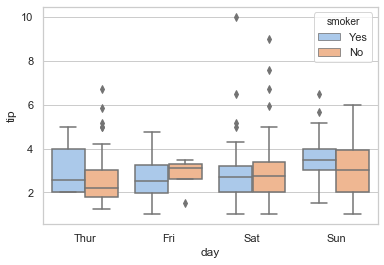

In [8]:
sns.set(style="whitegrid", palette="pastel")
sns.boxplot(data=tips, x='day', y='tip', hue='smoker')

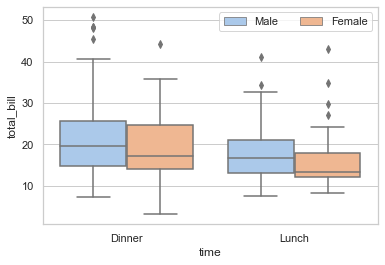

In [9]:
#### order 옵션으로 표시되는 순서를 지정할 수 있다. 
sns.boxplot(data=tips, x='time', y='total_bill', hue='sex', order=['Dinner', 'Lunch'])
plt.legend(ncol= 2, loc='upper right')   ## 범례 지정 

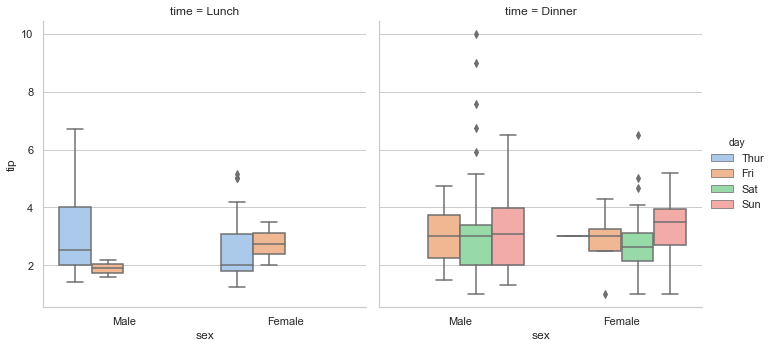

In [10]:
#### catplot과 col 옵션을 조합하면 여러개의 차트를 쉽게 그릴 수 있다. 
sns.catplot(data=tips, x='sex', y='tip', kind='box', hue='day', col='time')

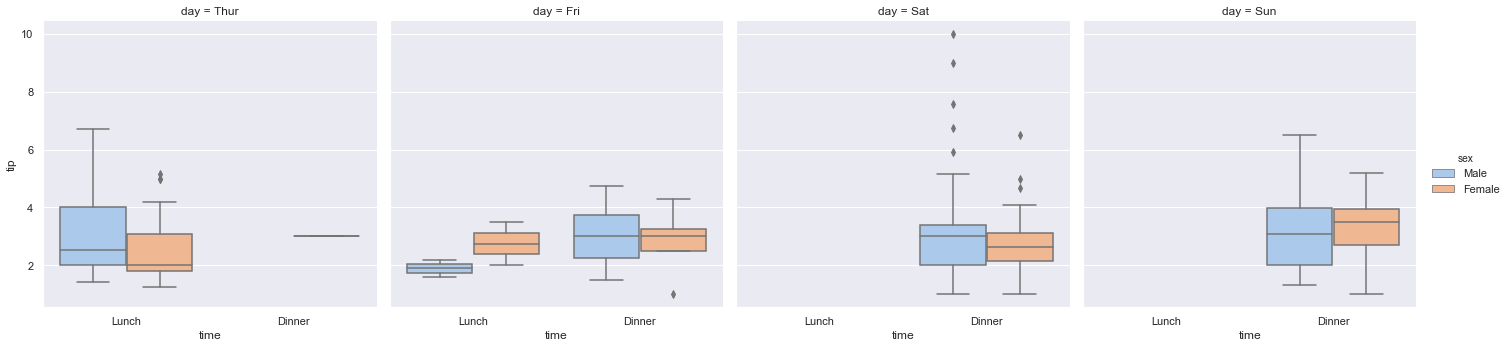

In [11]:
sns.set(style="darkgrid", palette="pastel")
sns.catplot(data=tips, x='time', y='tip', kind='box', hue='sex', col='day')

##### Part III. annotate
###### reference : https://github.com/corazzon/seaborn-tutorial/blob/master/seaborn_mpg_annotate.ipynb
###### seaborn 에서 annotate로 원하는 텍스트를 찍고자 하면 matplotlib을 함께 사용해야 합니다.

In [12]:
mpg = sns.load_dataset('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
model_year      398 non-null int64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


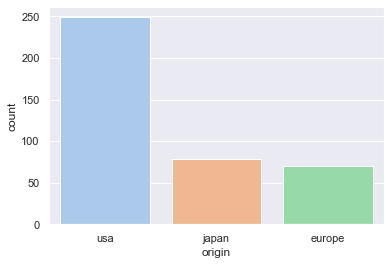

In [14]:
sns.countplot(data=mpg, x='origin')

In [15]:
print(mpg['origin'].unique())
print(mpg['origin'].value_counts())

['usa' 'japan' 'europe']
usa       249
japan      79
europe     70
Name: origin, dtype: int64


In [16]:
#### 국가별 자동차 대수를 차트에 표시해 주기 위해, 먼저 숫자를 얻어야 한다. 
mpg_origin = mpg['origin'].value_counts()
mpg_origin

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [17]:
#### 인덱스를 참조하여 각 국가별 자동차 대수를 알 수 있다. --> 함수에 사용하기 편하려는 목적... 
print(mpg_origin[0])
print(mpg_origin[1])
print(mpg_origin[2])

249
79
70


In [18]:
### mpg_origin 매트릭스로부터 인덱스 0, 1, 2를 가져오는 함수 
for i in range(mpg_origin.shape[0]):
    print(mpg_origin[i])

249
79
70


In [19]:
차트.text?

Object `text` not found.


In [ ]:
차트.text

In [20]:
#### g.text(x, y, s) ~ 차트 g에 대해서, 좌표 x-y의 위치에 s의 값을 넣어라  

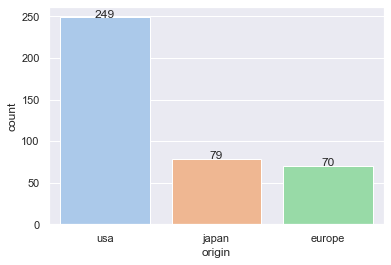

In [21]:
g = sns.countplot(data=mpg, x="origin")
for i in range(mpg_origin.shape[0]):
    g.text(x=i, y=mpg_origin[i], s=mpg_origin[i],   
           horizontalalignment='center')            ## 가운데 정렬 
    
    ### i=0일때 : x=0, y=249, s=249 ---> 좌표 0:249의 위치에 값 249를 넣어라!! 

Text(200, 15, '<-- what is it??')

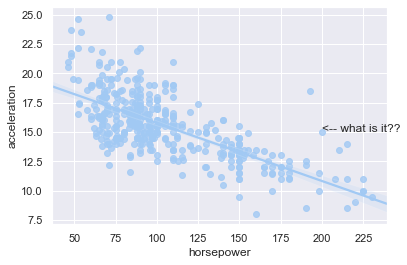

In [22]:
#### 다음과 같이 데이터셋 자체와는 상관없는 그냥 특정 위치를 지정해서 annotate를 표시할 수도 있다. 
g2 = sns.regplot(data=mpg, x='horsepower', y='acceleration')
g2.text(x=200, y=15, s='<-- what is it??')

Text(203, 15, '<-Porsche?')

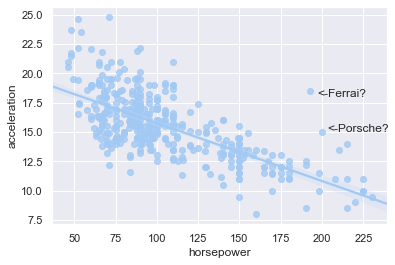

In [23]:
#### text 또는 annotate를 아래와 같이 사용할 수도 있다. 
sns.regplot(data=mpg, x='horsepower', y='acceleration')

plt.text(197, 18, '<-Ferrai?')             ## x,y 좌표와 s(string)을 지정 
plt.annotate('<-Porsche?', xy=(203, 15))   ## s(string)을 먼저 지정하고, xy=(,)형태로 좌표 지정 

##### Part IV. data 'melt'와 swarm plot
###### reference : https://seaborn.pydata.org/examples/scatterplot_categorical.html

In [24]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [25]:
#### 판다스의 melt를 사용하여 database형태로 쉽게 변경할 수 있다. 
iris2 = pd.melt(iris, "species", var_name="measurement")  ## 데이터셋, melt 기준, 새로만들어질 컬럼 이름 
iris2.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


In [26]:
print(iris.info())
print('-------------------------------------')
print(iris2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
-------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
species        600 non-null object
measurement    600 non-null object
value          600 non-null float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB
None


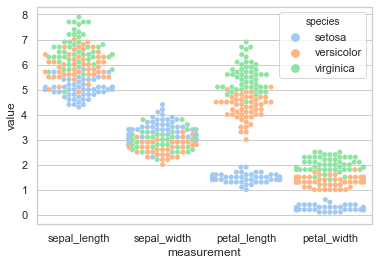

In [27]:
sns.set(style="whitegrid", palette="pastel")
sns.swarmplot(data=iris2, x="measurement", y="value", hue="species")

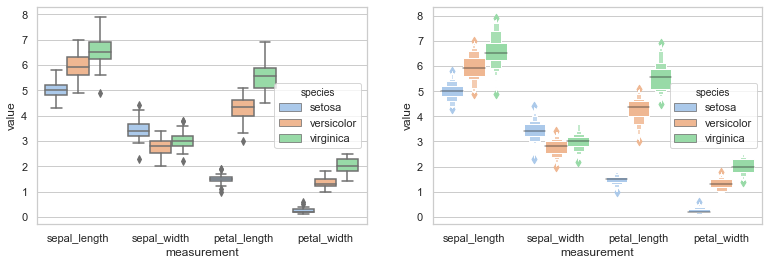

In [28]:
figure,(ax1,ax2) = plt.subplots(ncols=2)
figure.set_size_inches(13,4)
sns.boxplot(data=iris2, x="measurement", y="value", hue="species", ax=ax1)
sns.boxenplot(data=iris2, x="measurement", y="value", hue="species", ax=ax2)

##### Part V. boxplot, swarmplot을 가로로 그리기 
###### seaborn gallary : https://seaborn.pydata.org/examples/horizontal_boxplot.html

In [29]:
planets = sns.load_dataset('planets')
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
method            1035 non-null object
number            1035 non-null int64
orbital_period    992 non-null float64
mass              513 non-null float64
distance          808 non-null float64
year              1035 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [30]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [31]:
print(planets['method'].unique())
print('-------------------------------------------------------------------------')
print(planets['method'].describe())

['Radial Velocity' 'Imaging' 'Eclipse Timing Variations' 'Transit'
 'Astrometry' 'Transit Timing Variations' 'Orbital Brightness Modulation'
 'Microlensing' 'Pulsar Timing' 'Pulsation Timing Variations']
-------------------------------------------------------------------------
count                1035
unique                 10
top       Radial Velocity
freq                  553
Name: method, dtype: object


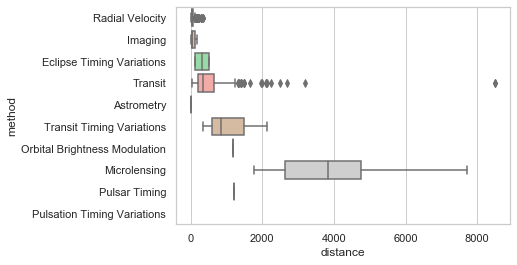

In [32]:
#### 간단하게 x, y축만 바꿔주면 된다. 
sns.boxplot(data=planets, x='distance', y='method')

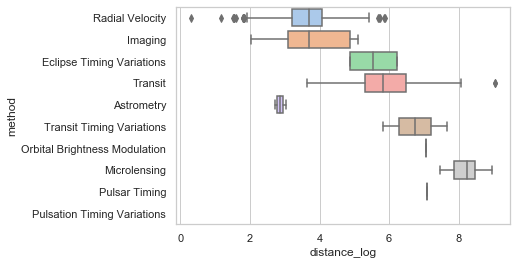

In [33]:
#### 항목간 거리의 범위가 너무 차이나므로, 거리에 log를 씌워 보정한다. 
planets['distance_log'] = np.log(planets['distance'])
sns.boxplot(data=planets, x='distance_log', y='method')

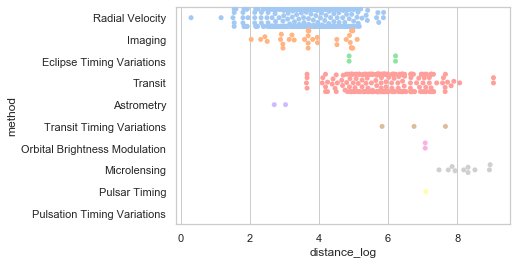

In [34]:
import warnings
warnings.filterwarnings("ignore")

sns.swarmplot(data=planets, x='distance_log', y='method')